In [162]:
import numpy as np
import pandas as pd
import manage_data as md
import managePeakData as mpd
import preprocessing as pp
%matplotlib inline
import matplotlib.pyplot as plt

In [164]:
data = pd.DataFrame()
target = pd.DataFrame()

In [157]:
df = mpd.importPeak(28)

In [158]:
df

,Ximf0,Ximf1,Ximf2,Yimf0,Yimf1,Yimf2,sticking,time_begin,time_end
0,2.40024,5.20052,4.00040,4.989267,4.644295,4.274771,False,60.0,64.0
1,2.00020,6.00060,4.40044,14.746767,4.816534,5.081753,False,64.0,68.0
2,2.00020,2.00020,6.80068,5.016284,3.573306,2.816386,False,68.0,72.0
3,6.40064,6.40064,6.40064,6.405078,4.418592,3.990019,False,72.0,76.0
4,2.00020,2.00020,2.00020,22.992296,7.079908,16.370910,False,76.0,80.0
5,4.80048,6.40064,4.40044,7.423906,3.046025,4.758308,False,80.0,84.0
6,7.60076,4.00040,4.00040,2.032534,4.405580,3.983987,False,84.0,88.0
7,4.00040,4.00040,4.00040,6.888815,3.057100,6.262381,False,88.0,92.0
8,8.00080,4.00040,4.00040,1.767789,10.259093,6.339132,False,92.0,96.0
9,1.60016,4.00040,4.00040,2.159633,15.810453,15.122418,True,96.0,100.0


In [163]:
feature_col = df.iloc[:,0:6].keys()
feature_i = df[feature_col]
label_i = df['sticking']
data.append(feature_i)
target.append(label_i)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [133]:
type(features)
df_total = pd.DataFrame

pandas.core.frame.DataFrame

In [127]:
from sklearn import tree
feature_col = df.iloc[:,0:6].keys()
X = []
Y = []
for coil in [1,8,9,28,44,5,6,10,11,20,29,58,25,14,15,16,18]:
    df = mpd.importPeak(coil)
    Xi = zip(
            list(df['Ximf0']), list(df['Yimf0']), 
            list(df['Ximf1']), list(df['Yimf1']), 
            list(df['Ximf2']), list(df['Yimf2'])
            )
    Yi = list(df['sticking'])
    X += Xi
    Y += Yi
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
sum(Y)

ValueError: operands could not be broadcast together with shapes (0,) (27,6) 

In [112]:
data = []
prediction = []
for coil in range(88):
    try:
        df = mpd.importPeak(coil)
        Xi = zip(
                list(df['Ximf0']), list(df['Yimf0']), 
                list(df['Ximf1']), list(df['Yimf1']), 
                list(df['Ximf2']), list(df['Yimf2'])
                )
        Yi = list(df['sticking'])
        data.append(sum(Yi)>0)
        prediction.append(sum(clf.predict(Xi))>5)
        print coil, sum(Yi), sum(clf.predict(Xi))
    except:
        pass
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)/88.*100

0 0 3
1 0 0
2 8 2
3 14 2
4 6 4
5 0 0
6 0 0
7 27 26
8 7 7
9 1 1
10 0 0
11 0 0
12 0 1
13 7 0
14 0 0
15 0 0
16 0 0
17 0 1
18 0 0
19 0 1
20 11 11
21 7 1
22 0 1
23 0 4
24 0 0
25 0 0
26 0 0
27 0 5
28 13 13
29 13 13
30 0 4
32 0 0
33 0 2
34 4 5
35 0 1
36 0 2
37 5 1
38 14 10
39 0 1
40 12 5
41 0 5
42 0 0
43 3 4
44 2 2
45 0 8
46 0 9
47 0 2
48 0 1
49 29 3
50 10 2
51 0 4
52 4 3
53 8 5
54 0 0
55 0 4
56 0 4
57 0 11
58 0 0
59 0 5
60 0 2
61 0 0
62 10 7
63 0 3
64 0 6
65 18 4
66 9 2
67 0 1
68 0 5
69 0 2
70 0 2
71 8 3
72 16 5
73 0 2
74 12 12
75 0 3
76 0 0
77 0 18
78 29 6
79 15 1
80 15 3
81 27 4
82 17 4
83 12 2
84 0 4
85 0 4
86 0 4
87 0 0


65.909090909090907

In [113]:
sum(data)

33

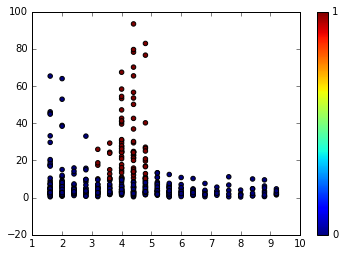

In [103]:
x_index = 2
y_index = 3

x = np.array(X)
y = np.logical_and(pp.is_between(x[:,x_index], 3, 5), x[:,y_index]>10)

xx = x[:,2:4]

# this formatter will label the colorbar with the correct target names
# formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(x[:,x_index], x[:,y_index], c=y)
plt.colorbar(ticks=[0, 1])
#plt.xlabel(iris.feature_names[x_index])
#plt.ylabel(iris.feature_names[y_index])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xx, y)

In [106]:
data = []
prediction = []
for coil in range(88):
    try:
        df = mpd.importPeak(coil)
        Xi = zip(df['Ximf1'].values, df['Yimf1'].values)
        Yi = df['sticking'].values
        print coil, sum(Yi), sum(clf.predict(Xi))
        data.append(sum(Yi)>0)
        prediction.append(sum(clf.predict(Xi))>5)
    except:
        pass
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)/88.*100

0 0 4
1 0 10
2 8 1
3 14 1
4 6 0
5 0 1
6 0 6
7 27 23
8 7 6
9 1 8
10 0 0
11 0 9
12 0 0
13 7 0
14 0 1
15 0 0
16 0 1
17 0 0
18 0 0
19 0 7
20 11 0
21 7 1
22 0 2
23 0 2
24 0 4
25 0 0
26 0 0
27 0 3
28 13 13
29 13 3
30 0 10
32 0 0
33 0 0
34 4 0
35 0 1
36 0 1
37 5 0
38 14 13
39 0 3
40 12 9
41 0 2
42 0 1
43 3 4
44 2 9
45 0 0
46 0 15
47 0 2
48 0 0
49 29 0
50 10 0
51 0 1
52 4 0
53 8 1
54 0 0
55 0 2
56 0 0
57 0 5
58 0 22
59 0 0
60 0 4
61 0 0
62 10 1
63 0 0
64 0 3
65 18 3
66 9 1
67 0 4
68 0 8
69 0 0
70 0 11
71 8 2
72 16 11
73 0 0
74 12 4
75 0 0
76 0 0
77 0 21
78 29 0
79 15 0
80 15 4
81 27 0
82 17 0
83 12 0
84 0 0
85 0 0
86 0 1
87 0 7


57.95454545454546

In [78]:
xx

array([[  4.00048006,  53.24631101],
       [  4.00048006,  42.66141939],
       [  4.00048006,  67.40822279],
       [  4.00048006,  25.18649274],
       [  4.00048006,  26.58195891],
       [  4.40052806,  13.87518356],
       [  4.40052806,  14.15994766],
       [  4.40052806,  15.87968027],
       [  4.40052806,   8.06539546],
       [  4.40052806,  22.76213439],
       [  4.40052806,  10.5378393 ],
       [  4.80057607,   2.66735213],
       [  4.80057607,   9.05710759],
       [  4.80057607,   3.85754427],
       [  4.80057607,   5.64747357],
       [  9.20110413,   2.76836298],
       [  2.80033604,   4.88538158],
       [  5.20062407,   3.70123195],
       [  5.60067208,   5.82829266],
       [  5.60067208,   3.17924123],
       [  8.40100812,   1.1216179 ],
       [  2.00024003,   0.76866815],
       [  2.00024003,   1.02927448],
       [  6.00072009,   1.44079918],
       [  6.40076809,  10.26504389],
       [  6.8008161 ,   3.29590004],
       [  7.2008641 ,   3.33241406],
 

In [84]:
df = mpd.importPeak(28)
Xi = zip(df['Ximf1'].values, df['Yimf1'].values)
Xi
sum(clf.predict(Xi))

10

In [14]:
a = zip([5,6],[5,6])

In [15]:
a

[(5, 5), (6, 6)]

In [17]:
list(a[0])

[5, 5]

In [38]:
x = np.array(X)
y = np.array(Y)

In [34]:
x.shape

(29, 6)

In [35]:
x[0,0]

3.2003200000000001

In [99]:
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)

(33, 38)

In [101]:
sum(data==prediction)

42

In [59]:
x[:,0]>20

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,